In [1]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rikiyudi","key":"33a4cbaf8e671864ff13a100e1c41572"}'}

In [7]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
!kaggle datasets download -d kaustubhb999/tomatoleaf
!unzip -q tomatoleaf.zip -d dataset


Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf
License(s): CC0-1.0
 87% 156M/179M [00:00<00:00, 680MB/s] 
100% 179M/179M [00:00<00:00, 526MB/s]


In [9]:
import os
os.listdir("/content/dataset")


['tomato', 'PlantVillage']

In [10]:
os.listdir("/content/dataset/tomato")


['train', 'val', 'cnn_train.py']

In [11]:
train_dir = '/content/dataset/tomato/train'
val_dir = '/content/dataset/tomato/val'


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9694 - loss: 0.0927 - val_accuracy: 0.8900 - val_loss: 0.5411
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9593 - loss: 0.1211 - val_accuracy: 0.8760 - val_loss: 0.6045
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9662 - loss: 0.0934 - val_accuracy: 0.8860 - val_loss: 0.6360
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9762 - loss: 0.0752 - val_accuracy: 0.8660 - val_loss: 0.6325
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9775 - loss: 0.0718 - val_accuracy: 0.8890 - val_loss: 0.5783
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9679 - loss: 0.0947 - val_accuracy: 0.8890 - val_loss: 0.5759
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9822 - loss: 0.0558 - val_accuracy: 0.8670 - val_loss: 0.6595
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9750 - loss: 0.0819 - val_accu

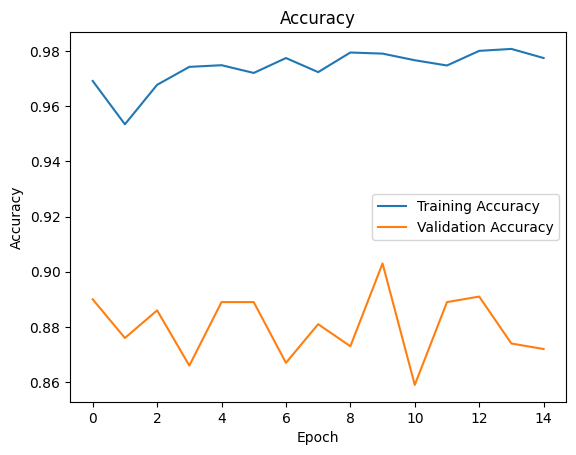

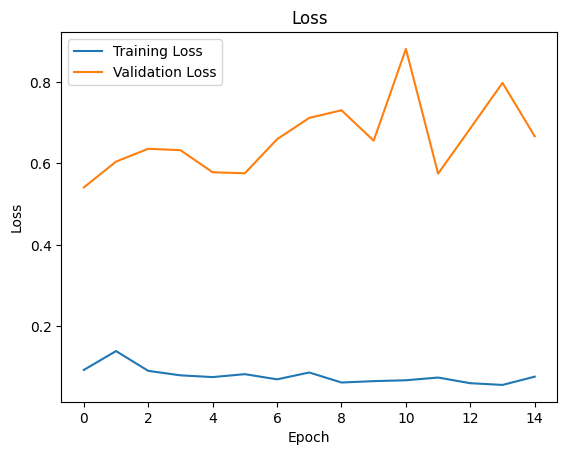

In [21]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Loss: {loss:.2f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.8579 - loss: 0.7041
Validation Accuracy: 0.87
Validation Loss: 0.67


In [28]:
from google.colab import files
uploaded = files.upload()

for fname in uploaded.keys():
    print("Prediksi:", predict_image(fname))


Saving Screenshot 2025-06-07 234254.png to Screenshot 2025-06-07 234254.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediksi: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [24]:
model.save("tomato_leaf_disease_model.h5")


In [25]:
from google.colab import files
files.download("tomato_leaf_disease_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>